# Thatcherize face using Dlib Face landmark detection

In [2]:
# Should be noted, that it only works using portrait-views of faces, and is only as reliable as Dlib (which is pretty good!).

In [3]:
# using https://towardsdatascience.com/face-landmark-detection-using-python-1964cb620837

In [4]:
# install in case your running on a clean environment
#!pip install cmake
#!pip install dlib
#!pip install opencv-contrib-python
#!pip install pandas as pd

## imports

In [5]:
import cv2
import dlib
import numpy as np
from PIL import Image
import os
import pandas as pd
import sys
sys.path.append("..")

In [6]:
dlib_save_directory = 'c:\\Users\\erikm\\Desktop\\Thesis'
dir_of_face_photos = 'c:\\Users\\erikm\\Downloads\\faces\\150_faces_170_images'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(dlib_save_directory+ '\\shape_predictor_68_face_landmarks.dat')

In [7]:
def get_landmarks(image_path):
	image = Image.open(image_path).convert('RGB')
	image = np.array(image)

	rects = detector(image, 1)
	for rect in rects:
		shape = predictor(image, rect)

	landmarks = detector(image, 1)
	for landmark_point in landmarks:
		shape = predictor(image, landmark_point)
		shape_np = np.zeros((68, 2), dtype="int")

		for i in range(0, 68):
			shape_np[i] = (shape.part(i).x, shape.part(i).y)
			new_shape = shape_np
	return image, new_shape

In [9]:
def get_eyes_and_mouth(landmarks):
	left_eye_landmarks = landmarks[37:42]
	right_eye_landmarks = landmarks[43:48]
	mouth_landmarks = landmarks[49:68]
	face_parts = []
	face_parts.append(left_eye_landmarks)
	face_parts.append(right_eye_landmarks)
	face_parts.append(mouth_landmarks)
	return face_parts

37-42 = left eye
37 = left corner of left eye 
40 = right corner of left eye
38, 39 = top edges
41, 42 = bot. edges

43-48 = left eye
43 = left corner of left eye 
46 = right corner of left eye
44, 45 = top edges
47, 48 = bot. edges

49-68 = mouth-related
51, 53 = top of mouth
49 = left corner of mouth
55 = right corner of mouth
58 = bottom of mouth

28-36 = nose-related
28 = top of nose (between eyes)
32 = leftmost part of bot. of nose
36 = rightmost part of bot. of nose
34 = bot. of nose

# Thatcherizing

In [36]:
def apply_padding(min, max):
	padding = 0.3 * (max-min)
	min = int(min - padding)
	max = int(max + padding)
	return  min, max

In [12]:
def get_limits(face_part, dim):
	min_val = min(face_part[:,dim])
	max_val = max(face_part[:,dim])	
	min_val, max_val = apply_padding(min_val, max_val)
	limits = [min_val, max_val]
	return limits

In [13]:
def find_boundaries_of_crop(face_part):
	y_limits = get_limits(face_part, dim=0)
	x_limits = get_limits(face_part, dim=1)
	return x_limits, y_limits

In [14]:
def flip_face_parts(image, limits):
	for elem in limits:
		print(elem)
		crop = image[elem[0][0]:elem[0][1], elem[1][0]:elem[1][1]]
		flipped_crop = np.flipud(crop)
		image[elem[0][0]:elem[0][1], elem[1][0]:elem[1][1]] = flipped_crop
	return image 

In [15]:
def find_limit_of_face_parts(face_parts):
	face_part_limits = []
	for face_part in face_parts:
		limits = []
		x_limits, y_limits = find_boundaries_of_crop(face_part)
		limits.append(x_limits)
		limits.append(y_limits)
		face_part_limits.append(limits)
	return face_part_limits

In [37]:
def thatcherize(image_path):
	image, landmarks = get_landmarks(image_path)
	face_parts = get_eyes_and_mouth(landmarks)
	limits = find_limit_of_face_parts(face_parts)

	image = flip_face_parts(image, limits)
	return image

In [38]:
cwd = os.getcwd()
img_path = cwd + '\\face_png.png'
image = thatcherize(img_path)

[[174, 193], [72, 116]]
[[172, 190], [174, 215]]
[[278, 323], [74, 211]]


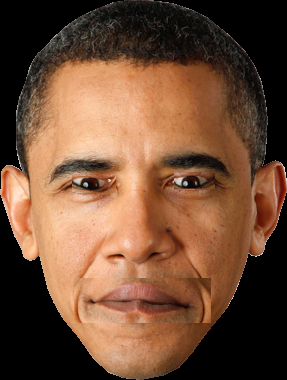

In [39]:
img = Image.fromarray(image, 'RGB')
img